In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# Importing dataset and separating labels
train_data = pd.read_csv("D:\ML\Datasets\emails.csv")
y_train = train_data['spam']
train_data.drop(labels='spam', axis=1, inplace=True)

In [11]:
# Creating bag of words
vectorizer = CountVectorizer(max_features=500)
X = vectorizer.fit_transform(train_data.text)
features = vectorizer.get_feature_names() # to check fature names if required
X_train = X.toarray()

In [12]:
# Splitting the dataset
state = 12
train_size = 0.6
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=train_size, stratify=y_train, random_state=state) # stratify=y_train preserves spam to ham ratio, might not be needed

In [13]:
# Building trees
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=5, random_state=0, verbose=3) # can specify loss function
gb_clf.fit(X_train, y_train)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

      Iter       Train Loss   Remaining Time 
         1           0.9661            0.06s
         2           0.8531            0.04s
         3           0.8177            0.04s
         4           0.7630            0.04s
         5           0.7216            0.04s
         6           0.6712            0.03s
         7           0.6458            0.03s
         8           0.6156            0.03s
         9           0.6007            0.03s
        10           0.5687            0.02s
        11           0.5541            0.02s
        12           0.5100            0.02s
        13           0.4940            0.02s
        14           0.4834            0.01s
        15           0.4585            0.01s
        16           0.4350            0.01s
        17           0.4176            0.01s
        18           0.4028            0.00s
        19           0.3875            0.00s
        20           0.3700            0.00s
Accuracy score (training): 0.938
Accuracy score (valid

In [14]:
# Testing trees
predictions = gb_clf.predict(X_test)
print('Confusion Matrix:') # printing confusion matrix using test values of Y and the predictive value of y
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[1672   73]
 [ 108  439]]


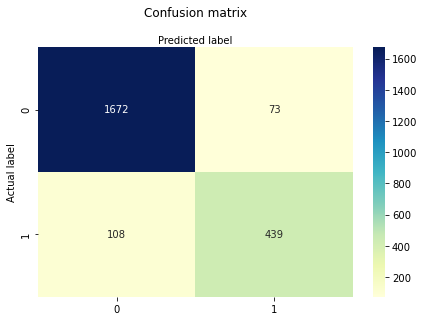

In [17]:
# Printing confusion matrix in the colored format seen below in output
cm = confusion_matrix(y_test, predictions)
cm
class_names=[0, 1] # names of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
# Printing classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1745
           1       0.86      0.80      0.83       547

    accuracy                           0.92      2292
   macro avg       0.90      0.88      0.89      2292
weighted avg       0.92      0.92      0.92      2292



In [ ]:
dd